In [286]:
#import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [287]:
#Store the data into the df variable
df = pd.read_csv('../data/MorningTest4.csv')

In [288]:
#Set the date as the index for the data
df = df.set_index(pd.DatetimeIndex(df['time'].values))
#Show the dataframe
df

,time,price
2021-01-23 10:01:32.855850,2021-01-23 10:01:32.855850,1219.403869
2021-01-23 10:01:34.076585,2021-01-23 10:01:34.076585,1219.335000
2021-01-23 10:01:35.171620,2021-01-23 10:01:35.171620,1219.325000
2021-01-23 10:01:36.264697,2021-01-23 10:01:36.264697,1219.385000
2021-01-23 10:01:37.362761,2021-01-23 10:01:37.362761,1219.425000
...,...,...
2021-01-23 11:48:19.403154,2021-01-23 11:48:19.403154,1249.158330
2021-01-23 11:48:20.530107,2021-01-23 11:48:20.530107,1249.345000
2021-01-23 11:48:21.626211,2021-01-23 11:48:21.626211,1249.215000
2021-01-23 11:48:22.723278,2021-01-23 11:48:22.723278,1249.245000


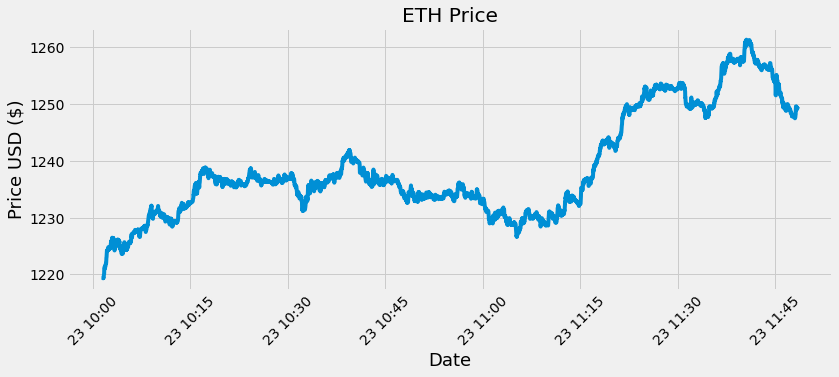

In [289]:
# Visually Show The Stock Price(s)
# Create the title
title = 'ETH Price'
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( my_stocks['price'],  label='price')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45) 
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

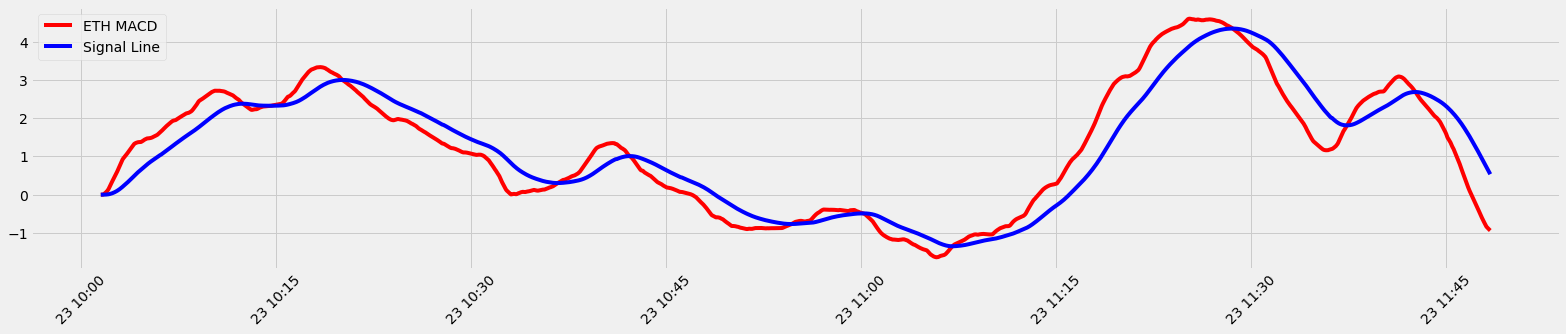

In [290]:
# macd_params = (12, 26, 9)
# macd_multiplier = 10
macd_params = (117, 254, 88)
macd_multiplier = 3

#Calculate the MACD and Signal Line indicators
#Calculate the Short Term Exponential Moving Average
ShortEMA = df.price.ewm(span=macd_params[0]*macd_multiplier, adjust=False).mean() #AKA Fast moving average
#Calculate the Long Term Exponential Moving Average
LongEMA = df.price.ewm(span=macd_params[1]*macd_multiplier, adjust=False).mean() #AKA Slow moving average
#Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
#Calcualte the signal line
signal = MACD.ewm(span=macd_params[2]*macd_multiplier, adjust=False).mean()

#Plot the chart
plt.figure(figsize=(24.4,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='ETH MACD', color = 'red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [291]:
#Create new columns for the data frame 
df['MACD'] = MACD
df['Signal Line'] = signal
#Show the new data frame
# df

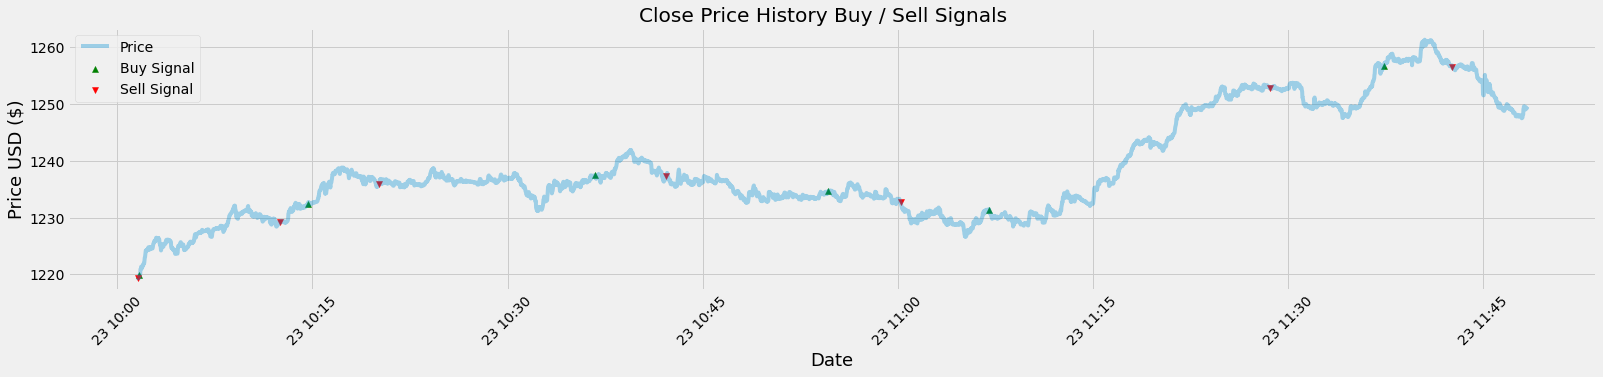

Profit 26.12288899999976
trans:  6


In [292]:
# Function to test the crossover driven profits of the macd and signal lines
def mac_daddy_tester(macd, signal, df):
    bought = False
    sumwin = 0
    transactions = []
    for i in range(1, len(df)):
        if ( (macd.iat[i] > signal.iat[i]) and (macd.iat[i-1] <= signal.iat[i-1]) and bought == False):
            # print("Crossed above, time to buy", i)
            bought = df.iat[i,1]
        if ( (macd.iat[i] < signal.iat[i]) and (macd.iat[i-1] >= signal.iat[i-1]) and bought):
            # print("Crossed below, time to sell", i)
            # print("Bought at\t", bought, " selling at\t", df.iat[i,0], "for profit:\t", df.iat[i,0] - bought)
            transactions.append(df.iat[i,1] - bought)
            sumwin = sumwin + df.iat[i,1] - bought - 1
            bought = False
    return(sumwin, transactions)


#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if MACD > signal line  then buy else sell
      if signal['MACD'][i] > signal['Signal Line'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['price'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      elif signal['MACD'][i] < signal['Signal Line'][i]: 
        if flag != 0:
          sigPriceSell.append(signal['price'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

#Create buy and sell columns
x = buy_sell(df)
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]

# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2*2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks['price'],  label='Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

r = mac_daddy_tester(MACD, signal, df)
print("Profit", r[0])
print("trans: ", len(r[1]))